<a href="https://colab.research.google.com/github/Ginny47/Sonoma-County-Wildfire/blob/main/Copy_of_LogisticRegression_WildFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

data1 = pd.read_csv('Weather_FireHistory_Train3.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8109 entries, 0 to 8108
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DailyAvgDr  8109 non-null   float64
 1   DailyAvgPr  8109 non-null   float64
 2   DailyAvgRe  8109 non-null   float64
 3   DailyAvgHo  8109 non-null   float64
 4   LongLat_X   8109 non-null   float64
 5   LongLat_Y   8109 non-null   float64
 6   FireEvent   8109 non-null   int64  
 7   Year        8109 non-null   int64  
 8   Month       8109 non-null   int64  
 9   Day         8109 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 633.6 KB


In [ ]:
data1.head()

,DailyAvgDr,DailyAvgPr,DailyAvgRe,DailyAvgHo,LongLat_X,LongLat_Y,FireEvent,Year,Month,Day
0,52.33,0.01,98.90,0.92,-122.8102,38.5038,0,2010,1,1
1,48.65,0.00,95.12,3.90,-122.8102,38.5038,0,2010,1,2
2,41.05,0.00,96.71,1.22,-122.8102,38.5038,0,2010,1,3
3,43.59,0.00,96.48,1.93,-122.8102,38.5038,0,2010,1,4
4,43.04,0.00,96.88,0.95,-122.8102,38.5038,0,2010,1,5


In [ ]:
data1.columns

Index(['DailyAvgDr', 'DailyAvgPr', 'DailyAvgRe', 'DailyAvgHo', 'LongLat_X',
       'LongLat_Y', 'FireEvent', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
data1.isnull().sum()

DailyAvgDr    0
DailyAvgPr    0
DailyAvgRe    0
DailyAvgHo    0
LongLat_X     0
LongLat_Y     0
FireEvent     0
Year          0
Month         0
Day           0
dtype: int64

In [ ]:
data1.size

81090

In [ ]:
data1.corr()

,DailyAvgDr,DailyAvgPr,DailyAvgRe,DailyAvgHo,LongLat_X,LongLat_Y,FireEvent,Year,Month,Day
DailyAvgDr,1.000000,-0.097284,-0.478137,0.305932,0.111731,0.009175,0.099489,0.061868,0.125739,-0.018959
DailyAvgPr,-0.097284,1.000000,0.136290,0.241580,0.099250,0.144034,-0.016212,-0.010956,-0.040272,-0.004054
DailyAvgRe,-0.478137,0.136290,1.000000,-0.368832,-0.395481,-0.320844,-0.148169,-0.034505,-0.060914,0.012589
DailyAvgHo,0.305932,0.241580,-0.368832,1.000000,0.309428,0.049129,-0.006400,0.117393,-0.087249,0.002612
LongLat_X,0.111731,0.099250,-0.395481,0.309428,1.000000,0.067291,0.070887,0.265003,0.022930,0.001084
LongLat_Y,0.009175,0.144034,-0.320844,0.049129,0.067291,1.000000,0.054012,-0.216034,-0.018005,-0.000905
FireEvent,0.099489,-0.016212,-0.148169,-0.006400,0.070887,0.054012,1.000000,0.064226,0.095569,0.026620
Year,0.061868,-0.010956,-0.034505,0.117393,0.265003,-0.216034,0.064226,1.000000,-0.003064,0.000918
Month,0.125739,-0.040272,-0.060914,-0.087249,0.022930,-0.018005,0.095569,-0.003064,1.000000,0.008183
Day,-0.018959,-0.004054,0.012589,0.002612,0.001084,-0.000905,0.026620,0.000918,0.008183,1.000000


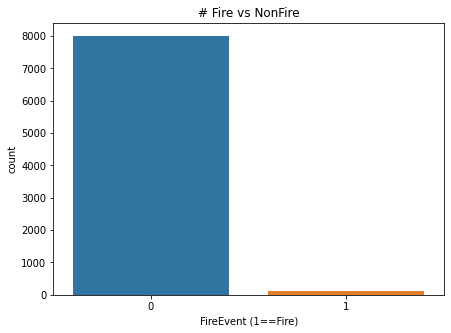

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='FireEvent', data=data1)
_ = plt.title('# Fire vs NonFire')
_ = plt.xlabel('FireEvent (1==Fire)')

In [ ]:
base_line_accuracy = 1-np.sum(data1.FireEvent)/data1.shape[0]
base_line_accuracy

0.9871747441114811

In [ ]:
X = data1.drop(columns='FireEvent', axis=1)
y = data1.FireEvent.values

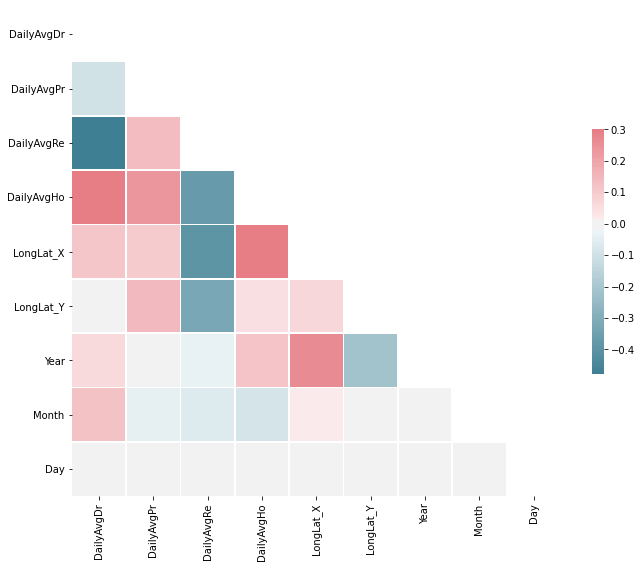

In [ ]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Training, Validating, and Testing set

First we split our data set into a train and a validation set by using the function train_test_split. The model performace


In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state=5)


In [ ]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [ ]:
model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
predicted_fire = model1.predict(X)
mean_absolute_error(y, predicted_fire)

0.01282525588851893

In [ ]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
# Fit model
model1.fit(X_train, y_train)

# get predicted fire on validation data
val_predictions = model1.predict(X_val)
print(mean_absolute_error(y_val, val_predictions))

0.011834319526627219


Training score and Test score

In [ ]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[6001    0]
 [  80    0]]
Training accuracy: 98.6844 %
Training AUC: 91.4493 %


In [ ]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing accuracy: %.4f %%' % test_accuracy)
print('Testing AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[1598    0]
 [  24    0]]
Testing accuracy: 98.5203 %
Testing AUC: 92.6210 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.985203  1.000000  0.992547      1598
           1   0.000000  0.000000  0.000000        24

    accuracy                       0.985203      1622
   macro avg   0.492602  0.500000  0.496273      1622
weighted avg   0.970626  0.985203  0.977860      1622



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


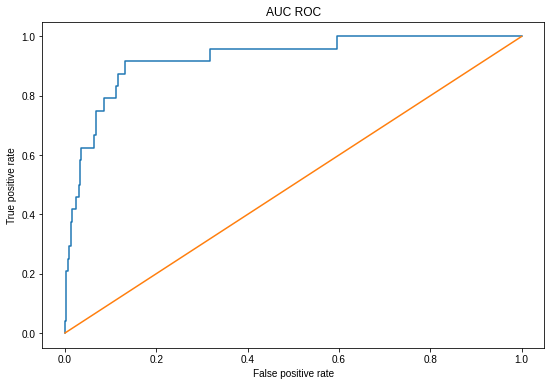

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)

In [ ]:
y_hat_90 = (y_test_hat_probs > 0.90 )*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_90))
print(classification_report(y_test, y_hat_90, digits=6))

Confusion matrix:
 [[1598    0]
 [  24    0]]
              precision    recall  f1-score   support

           0   0.985203  1.000000  0.992547      1598
           1   0.000000  0.000000  0.000000        24

    accuracy                       0.985203      1622
   macro avg   0.492602  0.500000  0.496273      1622
weighted avg   0.970626  0.985203  0.977860      1622



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_hat_10 = (y_test_hat_probs > 0.10)*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_10))
print(classification_report(y_test, y_hat_10, digits=4))

Confusion matrix:
 [[1575   23]
 [  14   10]]
              precision    recall  f1-score   support

           0     0.9912    0.9856    0.9884      1598
           1     0.3030    0.4167    0.3509        24

    accuracy                         0.9772      1622
   macro avg     0.6471    0.7011    0.6696      1622
weighted avg     0.9810    0.9772    0.9790      1622

